<a href="https://colab.research.google.com/github/moist234/ECON3916-Statistical-Machine-Learning/blob/main/lab-05/Lab5_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# 55524

[0 1 0 ... 0 0 0]


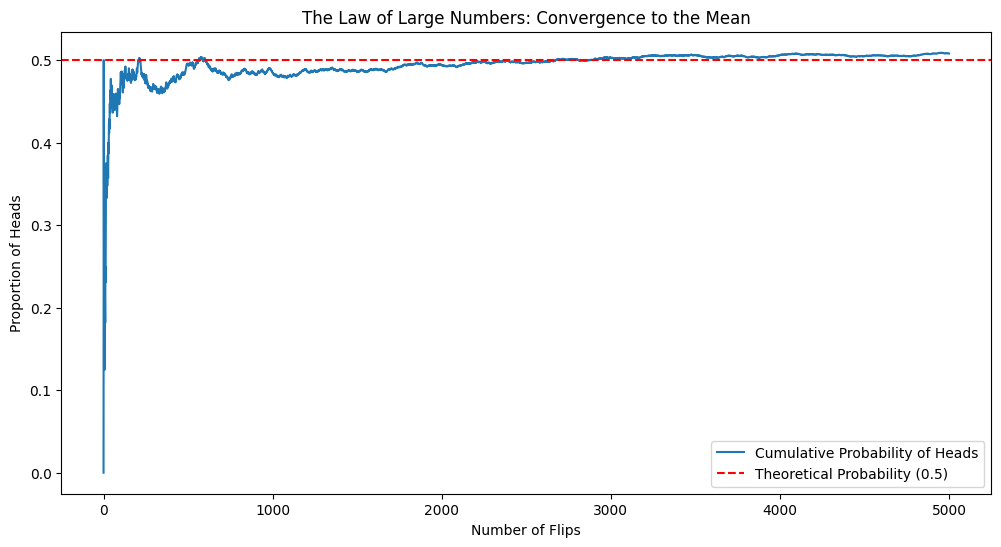

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    print(flips)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(5000)

In [42]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 33.08%
Win Rate (Switch): 66.92%


Probability of Revenue Decline: 18.15%
95% Value at Risk (Worst Case): $9,593,701.90


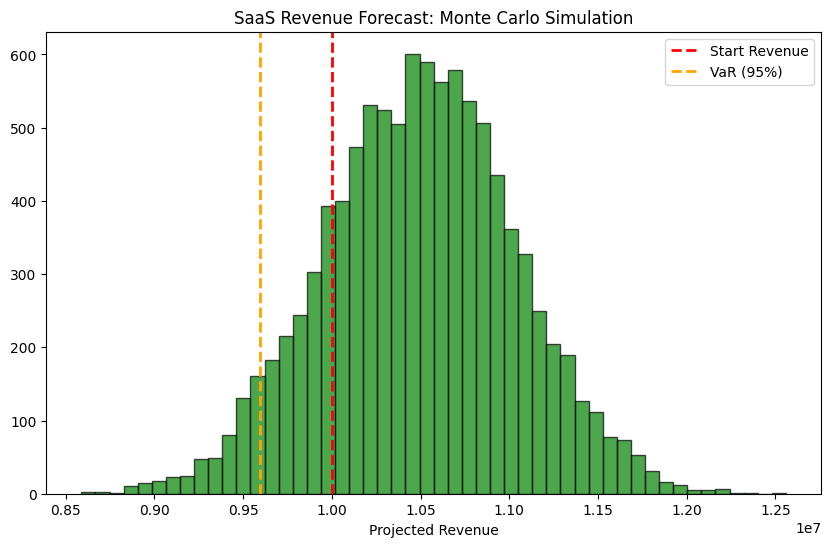

In [43]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

95% VaR (Normal Sales):   $9,609,375.02
95% VaR (Fat-Tail Sales): $9,223,601.31


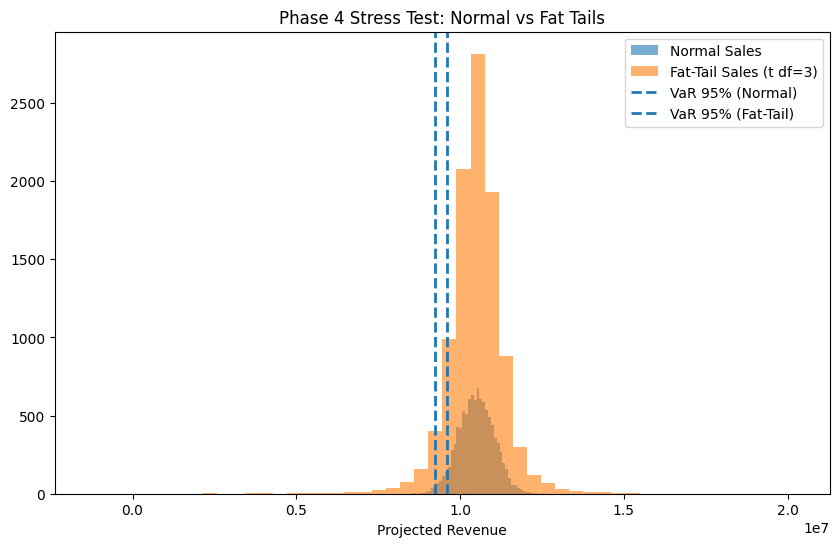

In [44]:
import matplotlib.pyplot as plt

def saas_fat_tail_stress_test(n_sims):
    base_rev = 10_000_000

    # Same churn as Module C
    churn_sims = np.random.normal(0.10, 0.02, n_sims)

    sales_normal = np.random.normal(1_500_000, 500_000, n_sims)
    net_rev_normal = base_rev * (1 - churn_sims) + sales_normal
    var_95_normal = np.percentile(net_rev_normal, 5)

    t_draws = np.random.standard_t(df=3, size=n_sims)

    sales_fat = 1_500_000 + t_draws * 500_000

    net_rev_fat = base_rev * (1 - churn_sims) + sales_fat
    var_95_fat = np.percentile(net_rev_fat, 5)

    # Compare
    print(f"95% VaR (Normal Sales):   ${var_95_normal:,.2f}")
    print(f"95% VaR (Fat-Tail Sales): ${var_95_fat:,.2f}")

    # Simple visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_rev_normal, bins=50, alpha=0.6, label="Normal Sales")
    plt.hist(net_rev_fat, bins=50, alpha=0.6, label="Fat-Tail Sales (t df=3)")
    plt.axvline(var_95_normal, linestyle='dashed', linewidth=2, label="VaR 95% (Normal)")
    plt.axvline(var_95_fat, linestyle='dashed', linewidth=2, label="VaR 95% (Fat-Tail)")
    plt.title("Phase 4 Stress Test: Normal vs Fat Tails")
    plt.xlabel("Projected Revenue")
    plt.legend()
    plt.show()

saas_fat_tail_stress_test(10000)

In [45]:
# Chief Risk Officer,

# I stress-tested our SaaS revenue Monte Carlo by changing only one assumption: New Sales. The standard model uses a Normal distribution (bell curve), but real markets often experience “fat tails,” meaning extreme outcomes happen more often than the Normal model predicts.

# To capture this, I replaced Normal New Sales with a Student’s t-distribution (df=3), which produces more outliers while keeping the same general sales scale. The business logic stayed identical: base revenue minus churn plus new sales.

# The key result is that the 95% Value at Risk (VaR) — the 5th percentile of projected revenue — is lower under the fat-tail model than under the Normal model. This happens because the t-distribution has a heavier downside tail, so “bad sales years” are more likely than the bell curve suggests.

# Implication: if we set capital reserves using the Normal VaR, we will be under-buffered more frequently than expected. The fat-tail VaR indicates a larger potential shortfall in low-probability scenarios, so a higher reserve requirement is justified to maintain the same confidence level in solvency and operating stability.